## Non-Responsive Coding

Evironment Set-up

In [1]:
# AWS
drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'

In [2]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys
import h5py

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
print manifest_file

boc = BrainObservatoryCache(manifest_file=manifest_file)

/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json


In [4]:
# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print 'all targeted structures: ' + str(targeted_structures)
# Download a list of all stimuli
stims = boc.get_all_stimuli()
print 'all stimuli: ' + str(stims)

all targeted structures: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']
all stimuli: ['drifting_gratings', 'locally_sparse_noise', 'locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_three', 'natural_movie_two', 'natural_scenes', 'spontaneous', 'static_gratings']


In [5]:
# Create a dictionary depicting Cre lines
cre_to_layer={} #dic of cre line paired with layer of expression
cre_to_layer['Cux2-CreERT2']='Layer 2,3 & 4'
cre_to_layer['Emx1-IRES-Cre']='Pan excitatory expression'
cre_to_layer['Nr5a1-Cre']='Layer 4'
cre_to_layer['Rbp4-Cre_KL100']='Layer 5'
cre_to_layer['Rorb-IRES2-Cre']='Layer 4'
cre_to_layer['Scnn1a-Tg3-Cre']='Layer 4'
print(cre_to_layer)
cre_lines=cre_to_layer.keys()
print(cre_lines)

{'Nr5a1-Cre': 'Layer 4', 'Cux2-CreERT2': 'Layer 2,3 & 4', 'Scnn1a-Tg3-Cre': 'Layer 4', 'Rbp4-Cre_KL100': 'Layer 5', 'Rorb-IRES2-Cre': 'Layer 4', 'Emx1-IRES-Cre': 'Pan excitatory expression'}
['Nr5a1-Cre', 'Cux2-CreERT2', 'Scnn1a-Tg3-Cre', 'Rbp4-Cre_KL100', 'Rorb-IRES2-Cre', 'Emx1-IRES-Cre']


In [6]:
# layer at different imaging depths varies per animal
# Dictionary below creates an approximate imaging depth to cortical layer # conversion

depth_to_layer={} #dic translating imaging depth to lahyer
depth_to_layer['175']='Layer 2/3'
depth_to_layer['265']='Layer 2/3'
depth_to_layer['275']='Layer 2/3'
depth_to_layer['300']='Layer 3'
depth_to_layer['320']='Layer 4'
depth_to_layer['325']='Layer 4'
depth_to_layer['335']='Layer 4'
depth_to_layer['350']='Layer 4'
depth_to_layer['365']='Layer 4'
depth_to_layer['375']='Layer 5'
depth_to_layer['435']='Layer 5'
print(depth_to_layer)

{'435': 'Layer 5', '300': 'Layer 3', '350': 'Layer 4', '335': 'Layer 4', '320': 'Layer 4', '275': 'Layer 2/3', '265': 'Layer 2/3', '325': 'Layer 4', '175': 'Layer 2/3', '365': 'Layer 4', '375': 'Layer 5'}


## Import Data from Visual Area and Cre-Line

In [7]:
# Choose a visual area and Cre-line to being
visual_area = 'VISp'
cre_line ='Rbp4-Cre_KL100'

# Import data from targeted area and Cre-line
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

#Create Data Frame
pd.DataFrame(exps)

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Rbp4-Cre_KL100,271750,False,555040113,375,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-271750,[],VISp
1,Rbp4-Cre_KL100,233442,False,511510758,375,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-233442,[],VISp
2,Rbp4-Cre_KL100,249136,False,529770662,375,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-249136,[],VISp
3,Rbp4-Cre_KL100,226219,False,511510896,375,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-226219,[],VISp
4,Rbp4-Cre_KL100,288600,False,571137444,375,Ai93(TITL-GCaMP6f),Rbp4-Cre;Camk2a-tTA;Ai93-288600,[],VISp


In [8]:
# Donor name is id linked to mouse
# Choose an experiment from 'id' column to begin
expt_container_id=555040113

In [9]:
# Get information from experimental session for id from id container
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id])

# This returns a list of dictionaries with information regarding experimental sessions of our specified exp container
print(expt_session_info)

# There are three sessions in every container that correspond to the 3 1 hr imaging session types

[{'imaging_depth': 375, 'experiment_container_id': 555040113, 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100', 'session_type': u'three_session_B', 'donor_name': u'271750', 'id': 559082739, 'acquisition_age_days': 118, 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-271750'}, {'imaging_depth': 375, 'experiment_container_id': 555040113, 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100', 'session_type': u'three_session_C2', 'donor_name': u'271750', 'id': 558581038, 'acquisition_age_days': 114, 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-271750'}, {'imaging_depth': 375, 'experiment_container_id': 555040113, 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100', 'session_type': u'three_session_A', 'donor_name': u'271750', 'id': 559192380, 'acquisition_age_days': 119, 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-271750'}]


In [10]:
# Create Data Frame of experimental sessions in your container
expt_session_info_df = pd.DataFrame(expt_session_info) #create pd dataframe so can look at each diff session from each expt
expt_session_info_df

,acquisition_age_days,cre_line,donor_name,experiment_container_id,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,118,Rbp4-Cre_KL100,271750,555040113,559082739,375,Ai93(TITL-GCaMP6f),three_session_B,Rbp4-Cre;Camk2a-tTA;Ai93-271750,VISp
1,114,Rbp4-Cre_KL100,271750,555040113,558581038,375,Ai93(TITL-GCaMP6f),three_session_C2,Rbp4-Cre;Camk2a-tTA;Ai93-271750,VISp
2,119,Rbp4-Cre_KL100,271750,555040113,559192380,375,Ai93(TITL-GCaMP6f),three_session_A,Rbp4-Cre;Camk2a-tTA;Ai93-271750,VISp


In [11]:
# Create a dictionary with session id's for all conditions
#First find id's for sessions A-C
session_id_A=expt_session_info_df[expt_session_info_df.session_type=='three_session_A'].id.values[0]
session_id_B=expt_session_info_df[expt_session_info_df.session_type=='three_session_B'].id.values[0]

# Note session_id_C needs to be adjusted based on whether C2 or C session type
session_id_C=expt_session_info_df[expt_session_info_df.session_type=='three_session_C2'].id.values[0]

# Create Session Dictionary
session_ids={'session_id_A':session_id_A, 'session_id_B':session_id_B, 'session_id_C':session_id_C}
print(session_ids)

{'session_id_A': 559192380, 'session_id_C': 558581038, 'session_id_B': 559082739}


In [12]:
# Make a data_set object for each Session A-C
data_set_A = boc.get_ophys_experiment_data(ophys_experiment_id=session_id_A)
data_set_B = boc.get_ophys_experiment_data(ophys_experiment_id=session_id_B)
data_set_C = boc.get_ophys_experiment_data(ophys_experiment_id=session_id_C)
data_sets=[data_set_A, data_set_B, data_set_C]

In [13]:
# Get the metadata for Sessions A-C
mdA = data_set_A.get_metadata()
mdB = data_set_B.get_metadata()
mdC = data_set_C.get_metadata()
print (mdA)
print (mdB)
print (mdC)

{'imaging_depth_um': 375, 'fov': u'400x400 microns (512 x 512 pixels)', 'genotype': u'Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)', 'ophys_experiment_id': 559192380, 'session_type': u'three_session_A', 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-271750', 'pipeline_version': u'2.0', 'excitation_lambda': u'910 nanometers', 'indicator': u'GCaMP6f', 'sex': u'female', 'device': u'Nikon A1R-MP multiphoton microscope', 'experiment_container_id': 555040113, 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100/wt', 'device_name': u'CAM2P.5', 'age_days': 120, 'session_start_time': datetime.datetime(2016, 11, 22, 13, 26, 2)}
{'imaging_depth_um': 375, 'fov': u'400x400 microns (512 x 512 pixels)', 'genotype': u'Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)', 'ophys_experiment_id': 559082739, 'session_type': u'three_session_B', 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-271750', 'pipeline_version': u'2.0', 'excitation_lambda': u'910 nanometer

In [14]:
#Get flourescene traces with neuropil correction
A=data_set_A.get_dff_traces()
B=data_set_B.get_dff_traces()
C=data_set_C.get_dff_traces()

In [15]:
# Get timestamps by returning first part of tuple
timestamps_A=A[0]
timestamps_B=B[0]
timestamps_C=C[0]

In [16]:
# Get stimulus epoch table for each session
epoch_table_A=data_set_A.get_stimulus_epoch_table()
epoch_table_B=data_set_B.get_stimulus_epoch_table()
epoch_table_C=data_set_C.get_stimulus_epoch_table()

# Make a list of epoch tables
epoch_tables={'epoch_table_A':epoch_table_A, 'epoch_table_B':epoch_table_B, 'epoch_table_C':epoch_table_C}

# Make lists of epochs within each session
epoch_A_list=epoch_table_A['stimulus'].unique()
epoch_B_list=epoch_table_B['stimulus'].unique()
epoch_C_list=epoch_table_C['stimulus'].unique()

# Make a list of epoch lists
epoch_lists=[epoch_A_list, epoch_B_list, epoch_C_list]

# Create a dictionary pairing epoch table names with their lists table
epoch_master={'epoch_table_A':epoch_A_list, 'epoch_table_B':epoch_B_list, 'epoch_table_C':epoch_C_list}
print epoch_master

{'epoch_table_B': array([u'static_gratings', u'natural_scenes', u'spontaneous',
       u'natural_movie_one'], dtype=object), 'epoch_table_C': array([u'locally_sparse_noise_4deg', u'locally_sparse_noise_8deg',
       u'spontaneous', u'natural_movie_one', u'natural_movie_two'], dtype=object), 'epoch_table_A': array([u'drifting_gratings', u'natural_movie_three', u'natural_movie_one',
       u'spontaneous'], dtype=object)}


In [17]:
#Get deltaFF traces
Ca_A=A[1]
Ca_B=B[1]
Ca_C=C[1]
Ca_epoch_dict={'epoch_table_A':Ca_A, 'epoch_table_B':Ca_B, 'epoch_table_C':Ca_C}

# Find length of rows of np.array to find number of cells in sessino
cell_count=Ca_A.shape[0]

In [19]:
# Function to create epoched delta f array traces for each cell over the 3 sessions in dictionary called "ca_trace_by_epoch"
# Like stimuli will be concatenated
def create_ca_arrays(epoch_tables, Ca_epoch_dict, epoch_master):
    ca_trace_by_epoch = {}
    for table_str in epoch_tables:
        Ca=Ca_epoch_dict[table_str]
        for stim_n in epoch_master[table_str]:
            curr_ca = []
            for ind, stim_row in epoch_tables[table_str].iterrows():
                if stim_row['stimulus'] == stim_n:
                    curr_ca.append(Ca[:, stim_row['start'] : stim_row['end']])
            curr_ca = np.concatenate(curr_ca, axis=1)
            ca_trace_by_epoch[stim_n] = curr_ca
    return ca_trace_by_epoch
            
# Run function to create epoched ca trace arrays
ca_trace_by_epoch=create_ca_arrays(epoch_tables, Ca_epoch_dict, epoch_master)
print(ca_trace_by_epoch)



{u'natural_movie_two': array([[ -4.52866033e-02,   2.99198873e-04,   2.55152863e-02, ...,
         -1.79980940e-03,   9.79357064e-02,  -2.51380075e-02],
       [  5.14194369e-01,   5.01828730e-01,   4.90821630e-01, ...,
          5.04177064e-02,  -1.56130735e-03,  -3.14299241e-02],
       [  3.58253896e-01,   5.87656796e-01,   5.66380322e-01, ...,
         -1.00541469e-02,  -1.36154089e-02,  -1.26607874e-02],
       ..., 
       [  1.00821406e-01,   8.68573934e-02,  -5.22539392e-02, ...,
          3.97231206e-02,   7.38748237e-02,   1.92085579e-02],
       [ -4.88526896e-02,  -4.17319909e-02,   2.76746750e-02, ...,
          6.86801597e-03,  -3.12017743e-02,  -1.69812143e-02],
       [  3.50699015e-02,  -3.40399728e-03,   7.04520717e-02, ...,
         -1.04536153e-02,   6.18640557e-02,   6.28014132e-02]], dtype=float32), u'natural_movie_three': array([[-0.05679817,  0.03163213, -0.04042057, ..., -0.07149374,
        -0.01731712, -0.02567374],
       [-0.07234846, -0.03756365,  0.041750

## Use Data to Create Rolling Window Correlation Meauremtents with Minimum Threshold

In [ ]:
#loop over epochs, for each epoch loop over all pairs of cells
#loop 1 to n then loop 1 to current cell so only make half matrix
#then pull out array for two cells and go through then by window compute the pearson
#
#t_window = 10
#t_index = 1500, t1 = t_index, t2 = t1 + t_window
#signal_i = cell_array_window[cuurent_epoch][index_cell_i]
#signal_j = cell_array_window[cuurent_epoch][index_cell_j]
#correlation(signal_i[t1:t2], signal_j[t1, t2])

In [20]:
# First create cell_array, a dictionary with cell matrices for epochs where each row is a cell and each column is a deltaF measur
cell_array={}
cell_array_window={}
window_size=10
for epoch,array in ca_trace_by_epoch.iteritems():
    cell_num=array.shape[0]
    cell_matrix_temp=
    # First create matrix with every point sampled at 30 Hz
    for cell in range(0,(cell_num-1)):
        cell_temp=[]
        cell_matrix_temp_window=[]
        cell_temp=array[cell]
        cell_matrix_temp.append(cell_temp)
        # Now create rolling window binning by 'window size' to shorten array
        for i in range(0,len(cell_temp-1)):
            # Bin by taking average with rolling window of window size 
            window_temp=sum(cell_temp[i:(i+9)])/window_size
            cell_matrix_temp_window.append(window_temp)
            print cell_matrix_temp
            break
            
    cell_array[epoch]=cell_matrix_temp
    cell_array_window[epoch]=cell_matrix_temp_window
print cell_array
print cell_array_window



NameError: name 'cell_matrix_temp' is not defined

In [33]:
print cell_array.keys()
print cell_array_window.keys()

[u'spontaneous', u'natural_movie_three', u'natural_movie_one', u'locally_sparse_noise_8deg', u'drifting_gratings', u'locally_sparse_noise_4deg', u'natural_movie_two', u'static_gratings', u'natural_scenes']
[u'spontaneous', u'natural_movie_three', u'natural_movie_one', u'locally_sparse_noise_8deg', u'drifting_gratings', u'locally_sparse_noise_4deg', u'natural_movie_two', u'static_gratings', u'natural_scenes']


In [29]:
for row in cell_array_window.iterrows():
    for column in 
#    for i in range(0, (len(trace)-1)):
        

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [ ]:
for epoch in ca_trace_by_epoch:
    for i in range(len(epoch)a

## Get signal correlation

In [85]:
for data in data_sets:
    # Import natural scenes
    ns={}
    from allensdk.brain_observatory.natural_scenes import NaturalScenes
    ns[data] = NaturalScenes(data)
print(ns)

{<allensdk.core.brain_observatory_nwb_data_set.BrainObservatoryNwbDataSet object at 0x7f65ab3e1b50>: <allensdk.brain_observatory.natural_scenes.NaturalScenes object at 0x7f65abb51810>}


In [86]:
# Create list of session names
session_type={'session_id_A': 'three_session_A' , 'session_id_B': 'three_session_B', 'session_id_C': 'three_session_C'}

#Create analysis paths in dict called 'analysis path file'
analysis_path = os.path.join(drive_path,'ophys_experiment_analysis')
analysis_path_file={}
for session,idd in session_ids.iteritems():
    analysis_path_file[str(session)] = os.path.join(analysis_path, str(idd)+'_'+ str(session_type[session])+'_analysis.h5')
print analysis_path_file

{'session_id_A': '/data/dynamic-brain-workshop/brain_observatory_cache/ophys_experiment_analysis/559192380_three_session_A_analysis.h5', 'session_id_C': '/data/dynamic-brain-workshop/brain_observatory_cache/ophys_experiment_analysis/558581038_three_session_C_analysis.h5', 'session_id_B': '/data/dynamic-brain-workshop/brain_observatory_cache/ophys_experiment_analysis/559082739_three_session_B_analysis.h5'}


In [95]:
analysis_file=analysis_path_file['session_id_B']
f = h5py.File(analysis_file, 'r')
sc = f['analysis']['signal_corr_ns'].value
f.close()
#analysis_file = analysis_path_file['session_id_B']
#f = h5py.File(analysis_file, 'r')
#sc= f['analysis']['signal_corr_ns'].value
#sc= analysis_path_file['session_id_B']['analysis']['signal_corr_ns'].value
#analysis_file.close()

In [98]:
# Print shape of one signal correlation to check structure
print sc.shape

(64, 64)


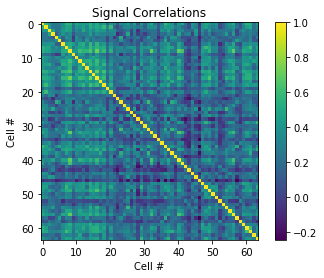

In [100]:
# Plot correlation matrix of cells for Natrual Scenes for three sessions
plt.imshow((sc), cmap='viridis', interpolation='none')
plt.xlabel("Cell #")
plt.ylabel("Cell #")
plt.title("Signal Correlations")
plt.colorbar()